In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
data = pd.read_csv('data/exchange.csv', sep=';')

# Convert the date column to datetime and set it as the index
data['Date'] = pd.to_datetime(data['DATE'])
data.set_index('Date', inplace=True)

# Rename 'RUB/USD' column to 'ExchangeRate' for convenience
data.rename(columns={'RUB/USD': 'ExchangeRate'}, inplace=True)
data.head()

,DATE,BRL/USD,ExchangeRate,INR/USD,YUAN/USD
Date,,,,,
1997-01-07,01/07/1997,1.0857,5.81631,35.9407,8.3395
1997-01-08,01/08/1997,1.0880,5.82318,35.7092,8.2996
1997-01-09,01/09/1997,1.0927,5.85338,36.4445,8.2858
1997-01-10,01/10/1997,1.0941,5.85263,36.0734,8.2524
1997-01-11,01/11/1997,1.1090,5.91892,37.0190,8.2940


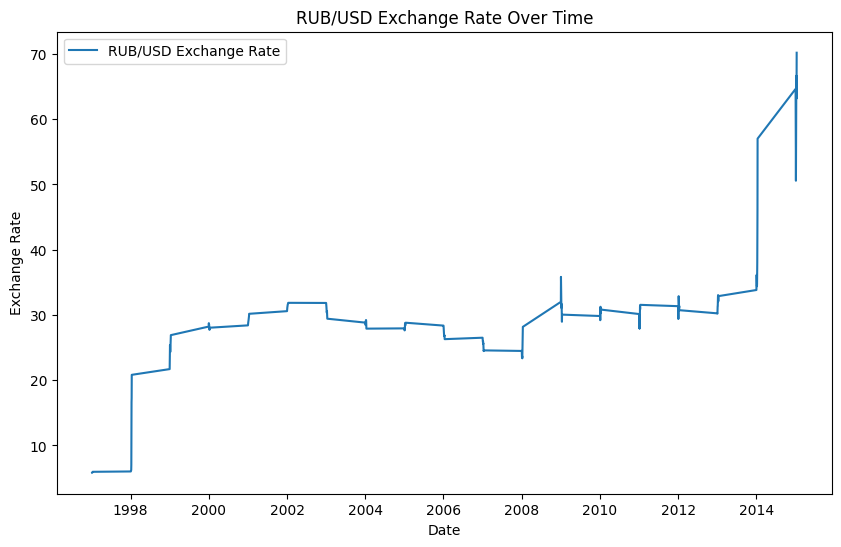

In [2]:
plt.figure(figsize=(10, 6))
plt.plot(data['ExchangeRate'], label='RUB/USD Exchange Rate')
plt.title('RUB/USD Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show();

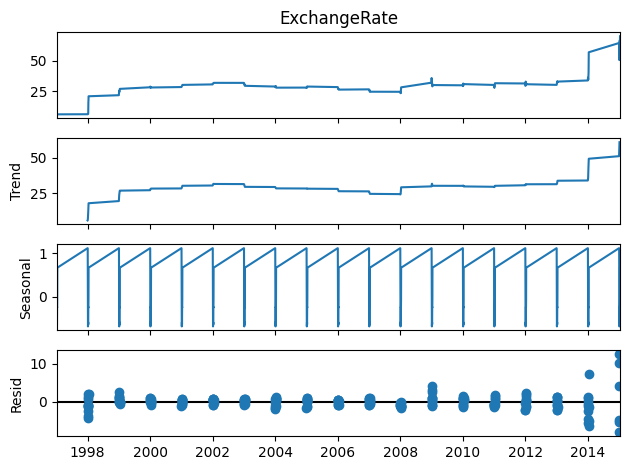

In [3]:
result = seasonal_decompose(data['ExchangeRate'], model='additive', period=12)
result.plot()
plt.show();

In [4]:
from utils.arima import get_best_pdq_params

get_best_pdq_params(data, 'ExchangeRate')

(2, 1, 3)

In [6]:
model = ARIMA(data['ExchangeRate'], order=(2, 1, 3))
model_fit = model.fit()
model_fit.summary()

c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           ExchangeRate   No. Observations:                  222
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -361.107
Date:                Thu, 05 Sep 2024   AIC                            734.215
Time:                        07:13:05   BIC                            754.604
Sample:                             0   HQIC                           742.448
                                - 222                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4994      0.034     14.499      0.000       0.432       0.567
ar.L2         -0.8097      0.032    -25.642      0.000      -0.872      -0.748
ma.L1          0.2638      0.172      1.534      0.125      -0.073       0.601
ma.L2          0.7115      0.725      0.981      0.326      -0.710       2.133
ma.L3          0.6840      0.588      1.164      0.244      -0.468       1.836
sigma2         1.4947      1.257      1.189      0.234      -0.969       3.958
===================================================================================
Ljung-Box (L1) (Q):                   0.35   Jarque-Bera (JB):              2140.67
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               3.03   Skew:                             2.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

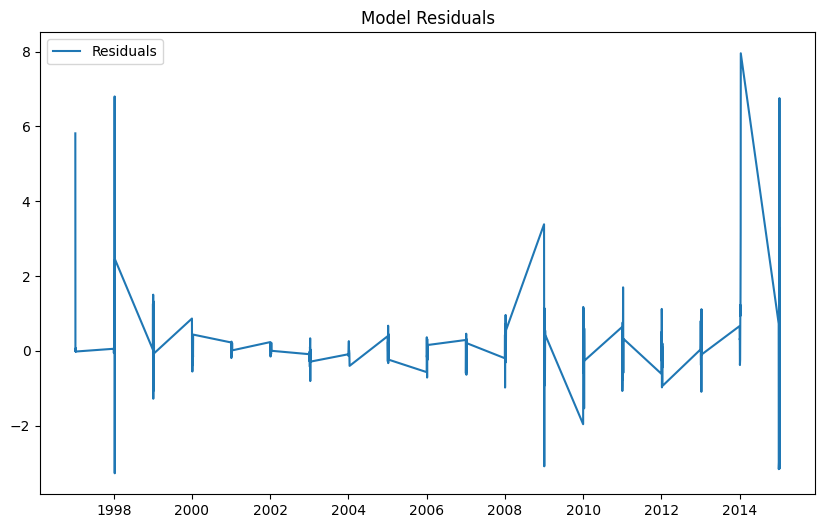

In [7]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('Model Residuals')
plt.legend()
plt.show()

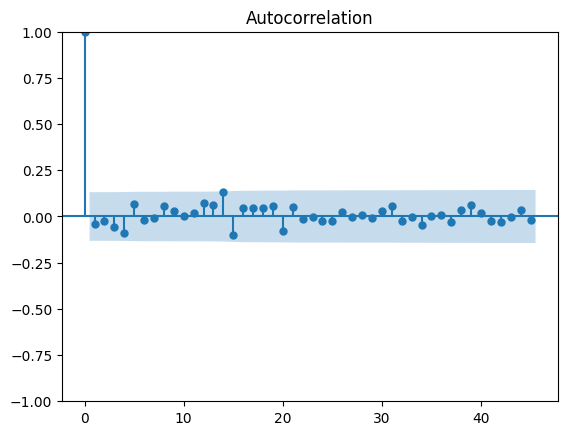

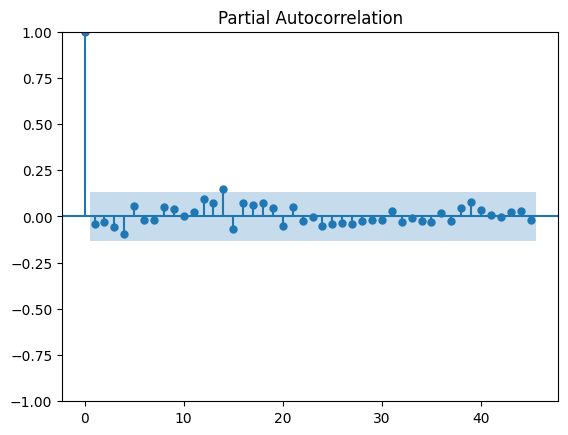

In [8]:
# Plot ACF and PACF to check for autocorrelations in residuals
plot_acf(residuals, lags=45)
plot_pacf(residuals, lags=45)
plt.show()

c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\User\AppData\Local\Temp\ipykernel_12352\3036380707.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast')


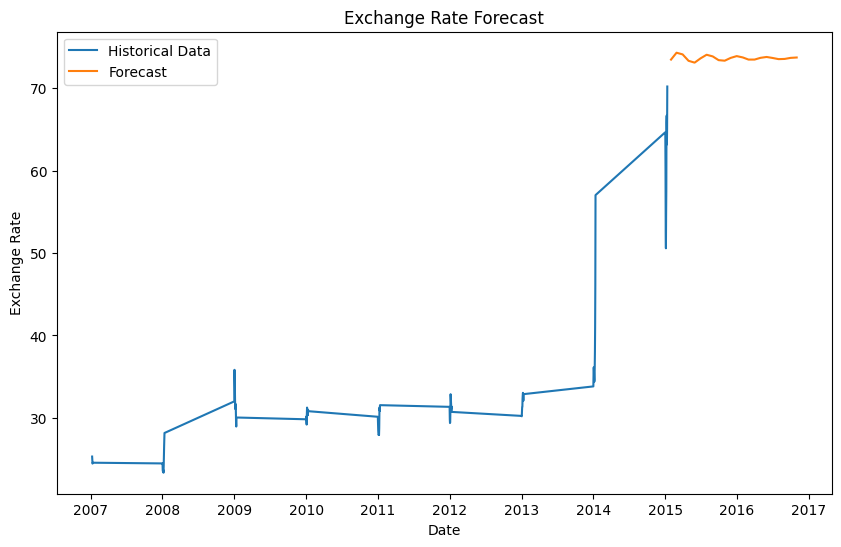

In [9]:
# Forecast the future values
forecast_steps = 22
forecast = model_fit.forecast(steps=forecast_steps)
plt.figure(figsize=(10, 6))
plt.plot(data.index[-100:], data['ExchangeRate'][-100:], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast')
plt.title('Exchange Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()

In [13]:
# Validate the forecast using a "hold-out" method
train = data.iloc[:-22]
test = data.iloc[-22:]
train.shape[0], test.shape[0]

(200, 22)

c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\User\trade\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

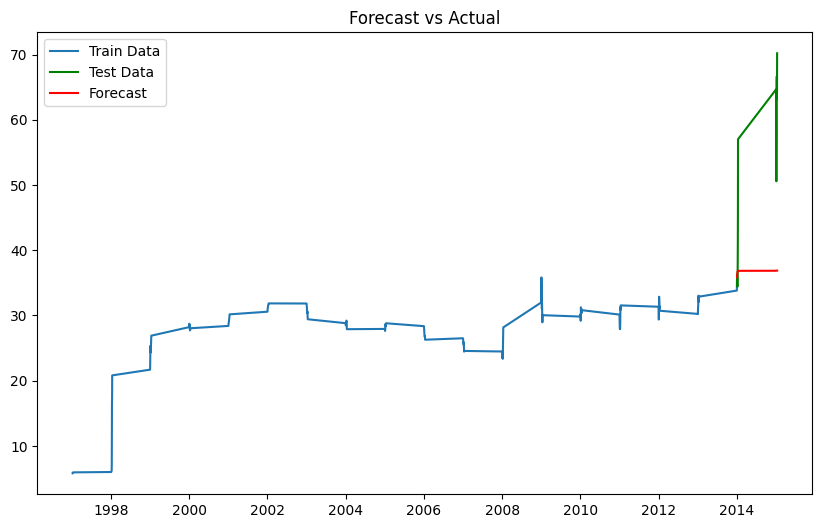

In [14]:
# Fit ARIMA model without the hold-out period
order = get_best_pdq_params(data, 'ExchangeRate')
model_no_hold = ARIMA(train['ExchangeRate'], order=order)
model_no_hold_fit = model_no_hold.fit()

# Forecast and plot against actual values
forecast_no_hold = model_no_hold_fit.forecast(steps=22)
plt.figure(figsize=(10, 6))
plt.plot(train.index, train['ExchangeRate'], label='Train Data')
plt.plot(test.index, test['ExchangeRate'], label='Test Data', color='green')
plt.plot(test.index, forecast_no_hold, label='Forecast', color='red')
plt.title('Forecast vs Actual')
plt.legend()
plt.show()